In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def cv_show(img):
    # 图像读取
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img = cv2.imread("data/image/boat1.jpeg")

cv_show(img)

## 直方图

In [4]:
# cv2.calcHist(images, channels, mask, hitSize, ranges)
#    images: 原图格式为unit8或float32；当传入函数时，要用[]，如[img]
#    channels: 用[]表示，表明统计的通道。若为灰度图，为[0]；若为彩色图，传入参数[0][1][2]分别代表 BGR
#    mask: 掩码图像。若统计整幅图为None，若统计某一部分需指定
#    histSize：BIN的数目，用[]
#    ranges: 像素值范围为[0, 256]

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
print("hist.shape: ", hist.shape)

hist.shape:  (256, 1)


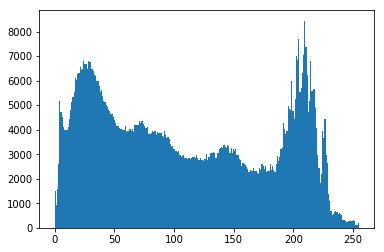

In [5]:
plt.hist(img.ravel(), 256)
plt.show()

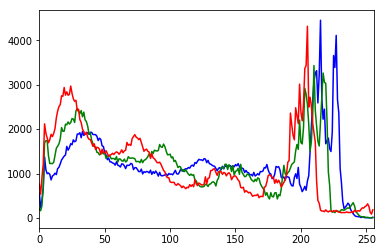

In [6]:
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])

## 掩码操作

In [7]:
# 创建掩码, 要保留的像素设置为255
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255

cv_show(mask)

In [8]:
# 进行与操作
masked_img = cv2.bitwise_and(img, img, mask=mask) # 与操作

cv_show(masked_img)

In [9]:
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

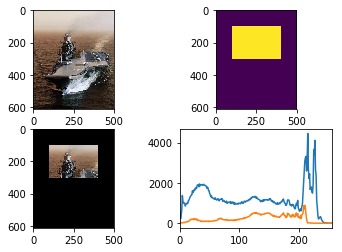

In [10]:
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(mask)
plt.subplot(223), plt.imshow(masked_img)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)

plt.xlim([0, 256])
plt.show()

## 直方图均衡化

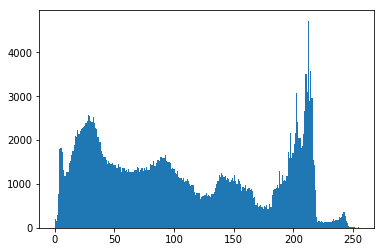

In [13]:
img = cv2.imread("data/image/boat1.jpeg", 0)

plt.hist(img.ravel(), 256)
plt.show()

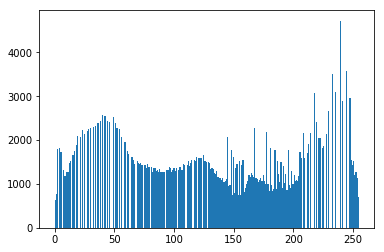

In [14]:
# 均衡化操作
equ = cv2.equalizeHist(img)

plt.hist(equ.ravel(), 256)
plt.show()

In [15]:
res = np.hstack((img, equ))

cv_show(res)

## 自适应直方图均衡化

In [29]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

In [30]:
res_clahe = clahe.apply(img)

res = np.hstack((img, res, res_clahe))
cv_show(res)

## 傅里叶变换

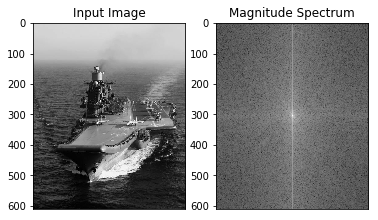

In [33]:
# OpenCV中主要函数为 cv2.dft() 和 cv2.idft(), 输入图像需要先转换成 np.float32格式
# 得到结果中频率为0的部分会在左上角，通常需要转换到中心位置，可以通过shift变换实现
# cv2.dft()返回结果是双通道的（实部、虚部），通常还需要转换成图像格式才能显示（0， 255）

img = cv2.imread("data/image/boat1.jpeg", 0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
# 将低频的值转换到中间的位置
dft_shift = np.fft.fftshift(dft)

# 得到灰度图表示的形式，映射到0-255之间
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.xticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.xticks([])
plt.show()

## 低通滤波

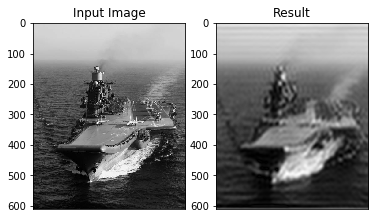

In [35]:
img = cv2.imread("data/image/boat1.jpeg", 0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

# 低通滤波，通过掩码保留中间的低频信息
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30: crow+30, ccol-30: ccol+30] = 1

# IDFT
# 同理，逆变换之前需要将中心转移回去
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# 得到灰度图表示的形式，映射到0-255之间
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.xticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Result'), plt.xticks([]), plt.xticks([])
plt.show()

## 高通滤波

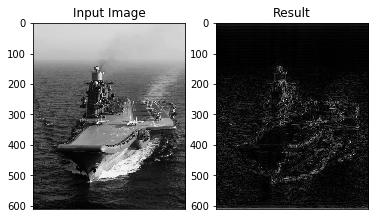

In [36]:
img = cv2.imread("data/image/boat1.jpeg", 0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

# 低通滤波，通过掩码保留中间的低频信息
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30: crow+30, ccol-30: ccol+30] = 0

# IDFT
# 同理，逆变换之前需要将中心转移回去
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# 得到灰度图表示的形式，映射到0-255之间
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.xticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Result'), plt.xticks([]), plt.xticks([])
plt.show()